I get this dataset from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) to detect fraudulent credit card transactions. This is a binary classification task.


I tried some machine learning models to find out which one has the best performance.

# 1. Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df = df.astype({"Class": "category"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  float64 
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
492/(284315+492)

0.001727485630620034

### Interpretation
1. The `Class`  variable was recognized as an integer variable which we changed its datatype into category.
2. The `Class` feature is the target variable. So, we checked the frequency of each class which shows the dataset is imbalanced and thus we need to handle this issue before model training. Class=1 (fraudulent transactions)is the minor class with only about 0.2% of the whole data.

# 2. EDA

##  2.1. Distribution of features within each class

<AxesSubplot: xlabel='V1', ylabel='Density'>

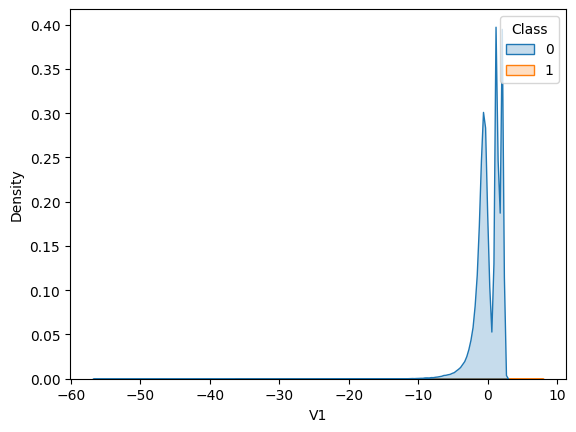

In [12]:
sns.kdeplot(data = df, x='V1', hue= 'Class', fill=True)

In [32]:
data_fraud = df[df["Class"]==1]
data = df[df["Class"]==0]
data = data.reset_index(drop=True)

In [54]:
random  = np.random.randint(low=0, high=284315, size=492)
data_random  = data.iloc[random]
combined_data = pd.concat([data_random, data_fraud])
combined_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228078,145534.0,1.937051,-0.151295,-0.336150,0.644517,-0.679837,-0.602053,-0.704402,-0.010781,1.387202,...,0.019876,0.311259,0.245458,-0.106536,-0.373820,-0.413773,0.081175,0.002964,9.99,0
228183,145579.0,2.144002,-0.199611,-2.358867,-0.679681,0.600769,-1.222465,0.630048,-0.495030,0.537780,...,0.074345,0.356144,-0.046708,0.588557,0.365128,1.057127,-0.149441,-0.084356,26.00,0
174027,121892.0,-0.125554,0.443095,0.119788,0.884702,2.139707,4.688744,-0.220110,1.128101,-0.589632,...,-0.085910,-0.327587,0.232936,0.650384,-0.657146,-0.527947,0.259335,0.190173,77.40,0
70742,54075.0,-0.644572,0.820411,1.278985,-0.482152,0.820824,-0.529156,0.690164,0.026138,-0.514889,...,-0.158043,-0.538478,-0.013827,-0.329654,-0.377876,-0.047169,0.083598,0.138746,1.98,0
193247,130219.0,1.397040,-1.127020,-1.319603,1.276149,-0.111331,0.388876,0.046203,0.086879,0.605192,...,0.225587,0.014675,-0.133403,0.152982,-0.089531,-0.705534,-0.038416,0.004198,309.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


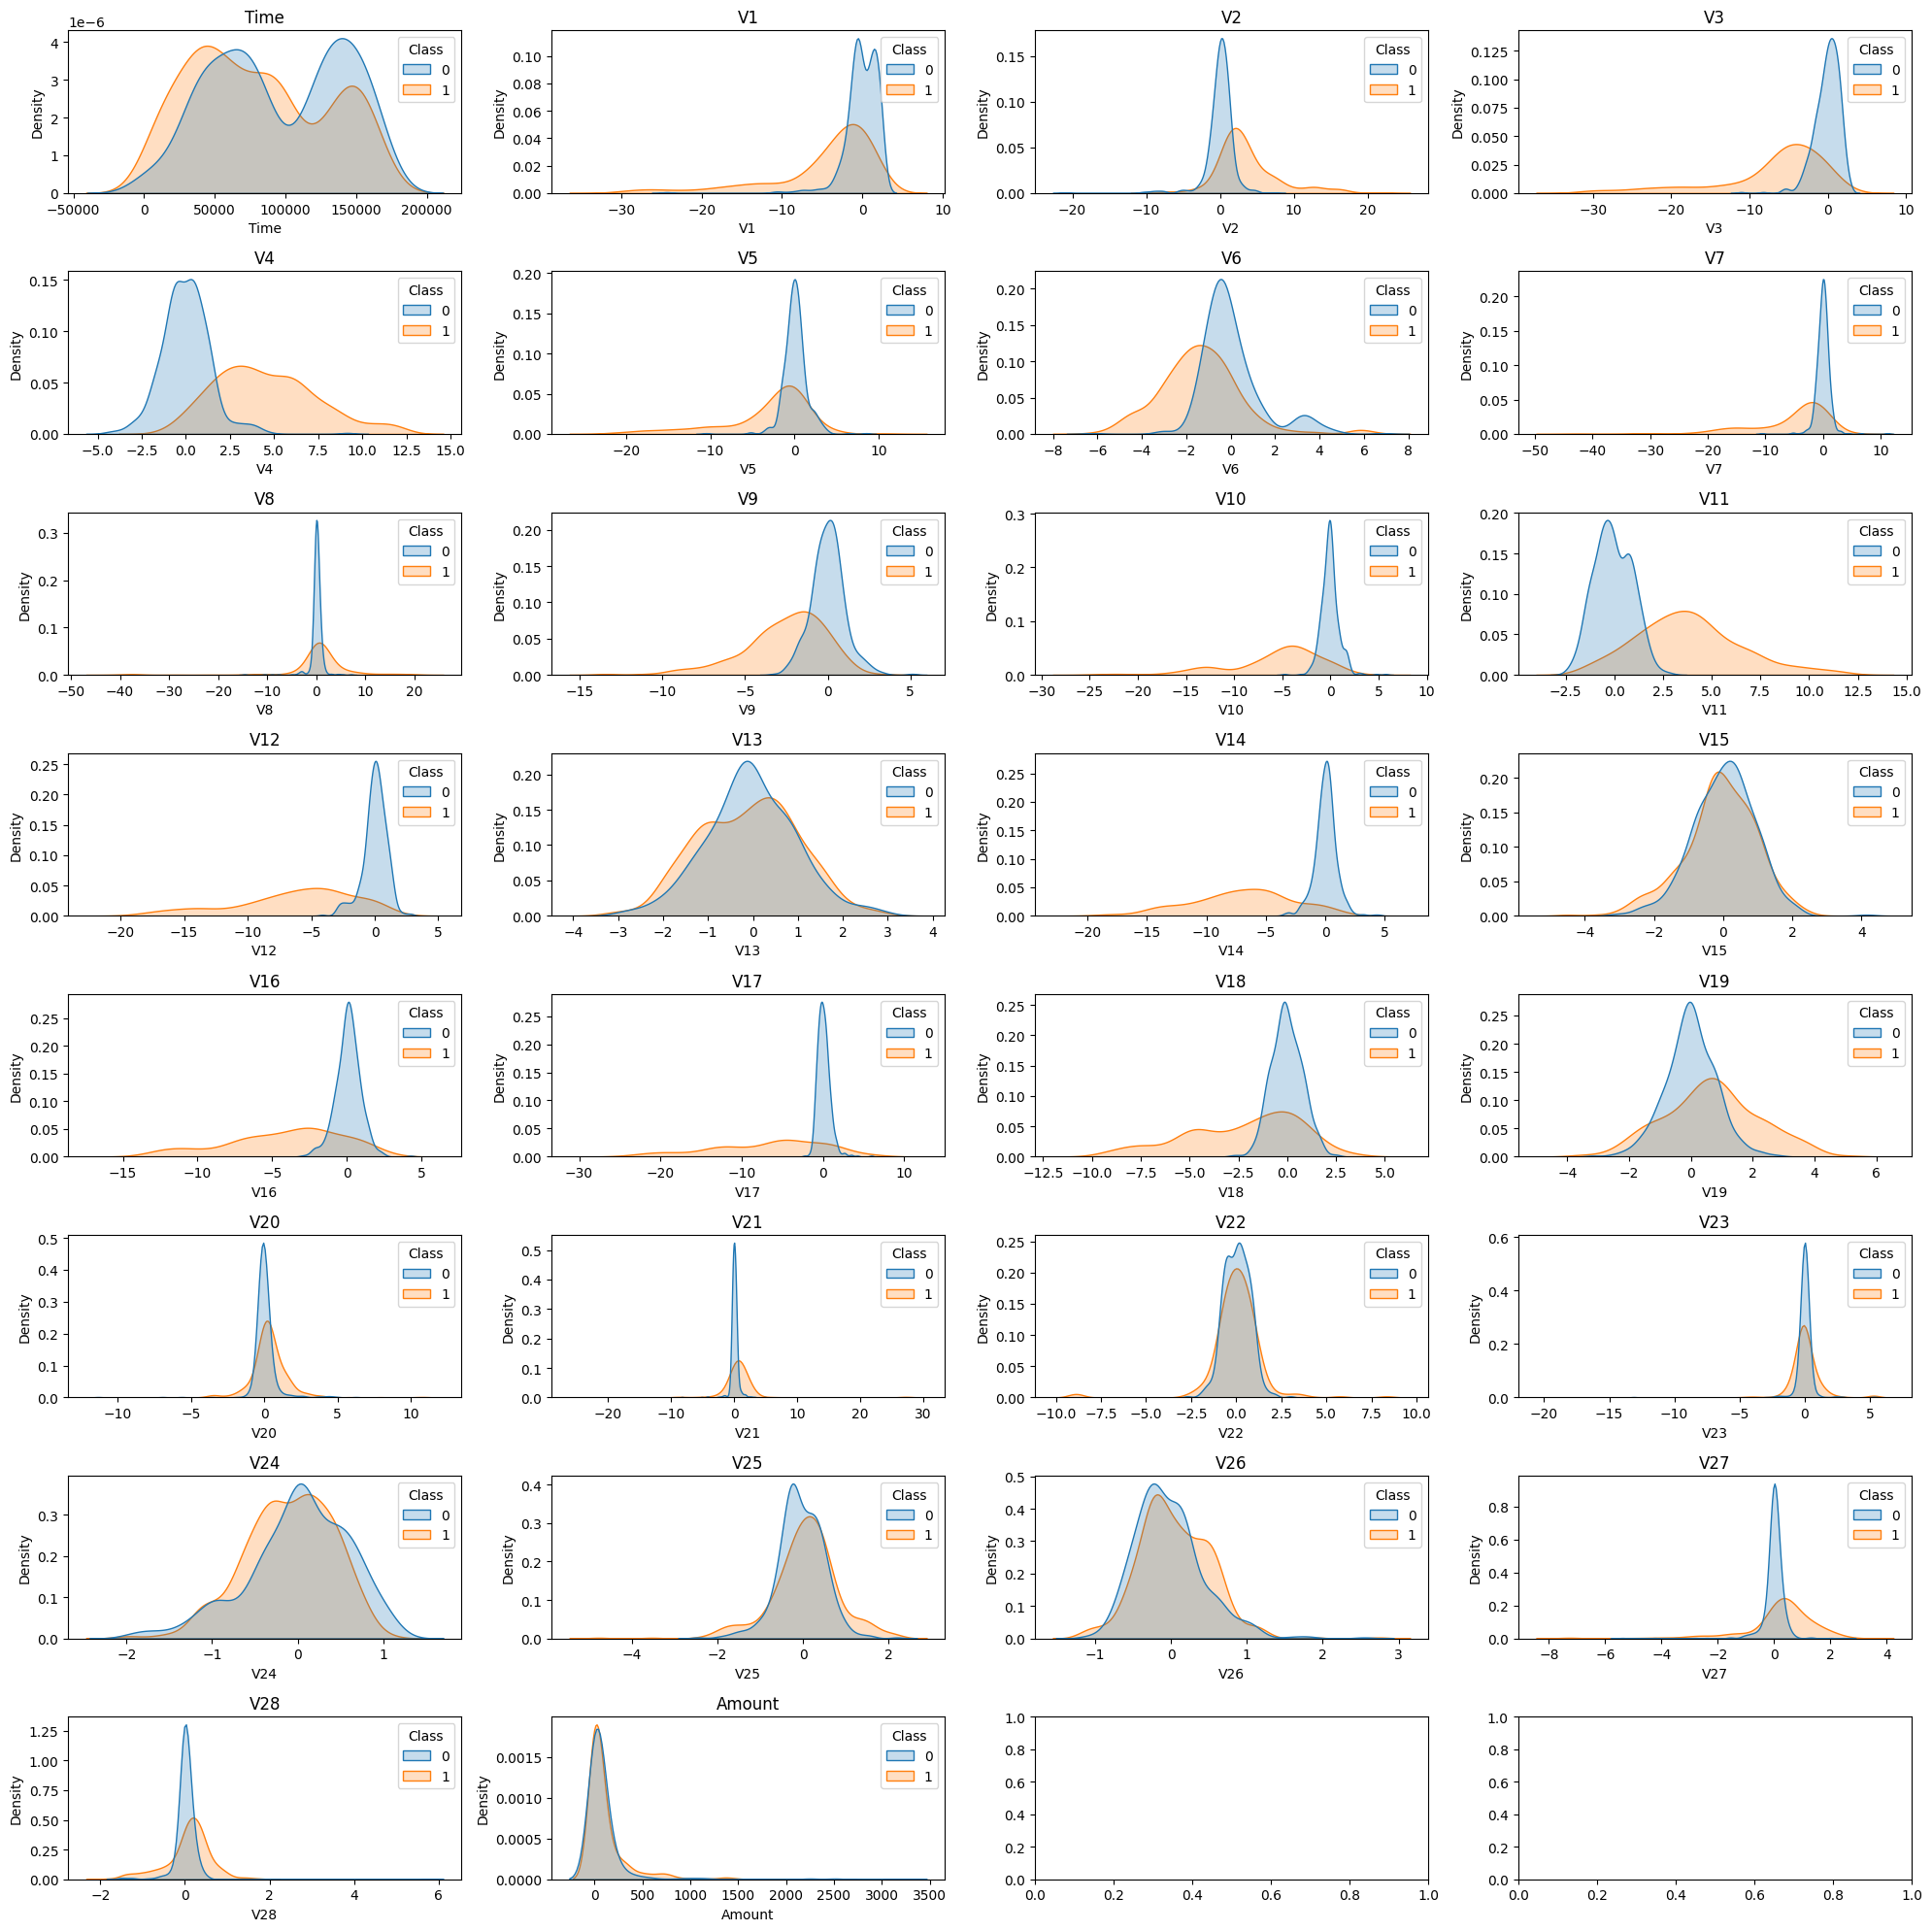

In [55]:
target= "Class"


fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(combined_data.columns):
    try:
        sns.kdeplot(data = combined_data, x = column, hue = target, fill= True, ax =axs[i]) #warn_singular = False)
        axs[i].set_title(column)
    except:
        pass


plt.tight_layout()
plt.show()

### Interpretation
1. Since the frequency of the minor class is very small compared with the major class, the KDE plot of the whole dataset was not clear (look at the first cell). Thus, I randomly selected 429 samples of the major class and then created a combined_data dataset which contains all samples of the minor class and the randomly selected 429 samples of the major class. 
2. The result shows that there is a meaningful difference between the density of these features in the minor class and major class for almost all features. 
3. **Remark:** To make sure whether the above conclusion works all the time, we have to run the above cells multiple times to check whether the result is the same for various randomly selected observations.

## 2.2. Mean, min and max of the `Amount` feature within each class

In [12]:
df.groupby('Class')["Amount"].min()

Class
0    0.0
1    0.0
Name: Amount, dtype: float64

In [61]:
df.groupby('Class')["Amount"].max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

In [14]:
df.groupby('Class')["Amount"].mean()

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

In [15]:
df.groupby('Class')["Amount"].std()

Class
0    250.105092
1    256.683288
Name: Amount, dtype: float64

<AxesSubplot: xlabel='Amount', ylabel='Density'>

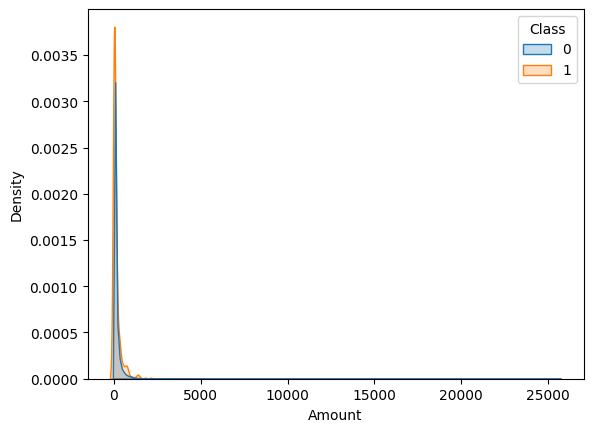

In [16]:
sns.kdeplot(data = df, x="Amount", hue= target, fill=True, common_norm= False)
# common_norm =False means normalize each density independently.

<AxesSubplot: xlabel='Class', ylabel='Amount'>

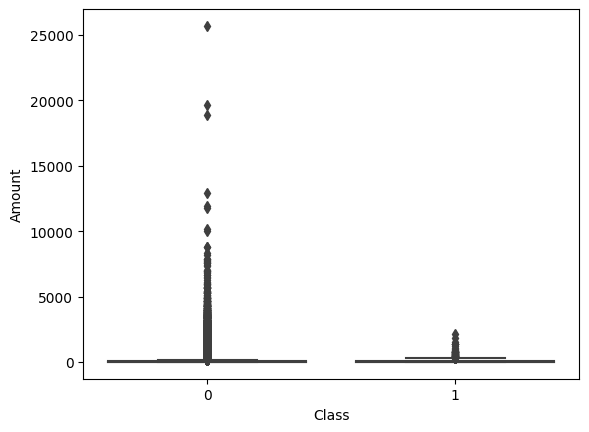

In [17]:
sns.boxplot(data = df, x= "Class", y = "Amount")

## 2.3. Distribution of each feature

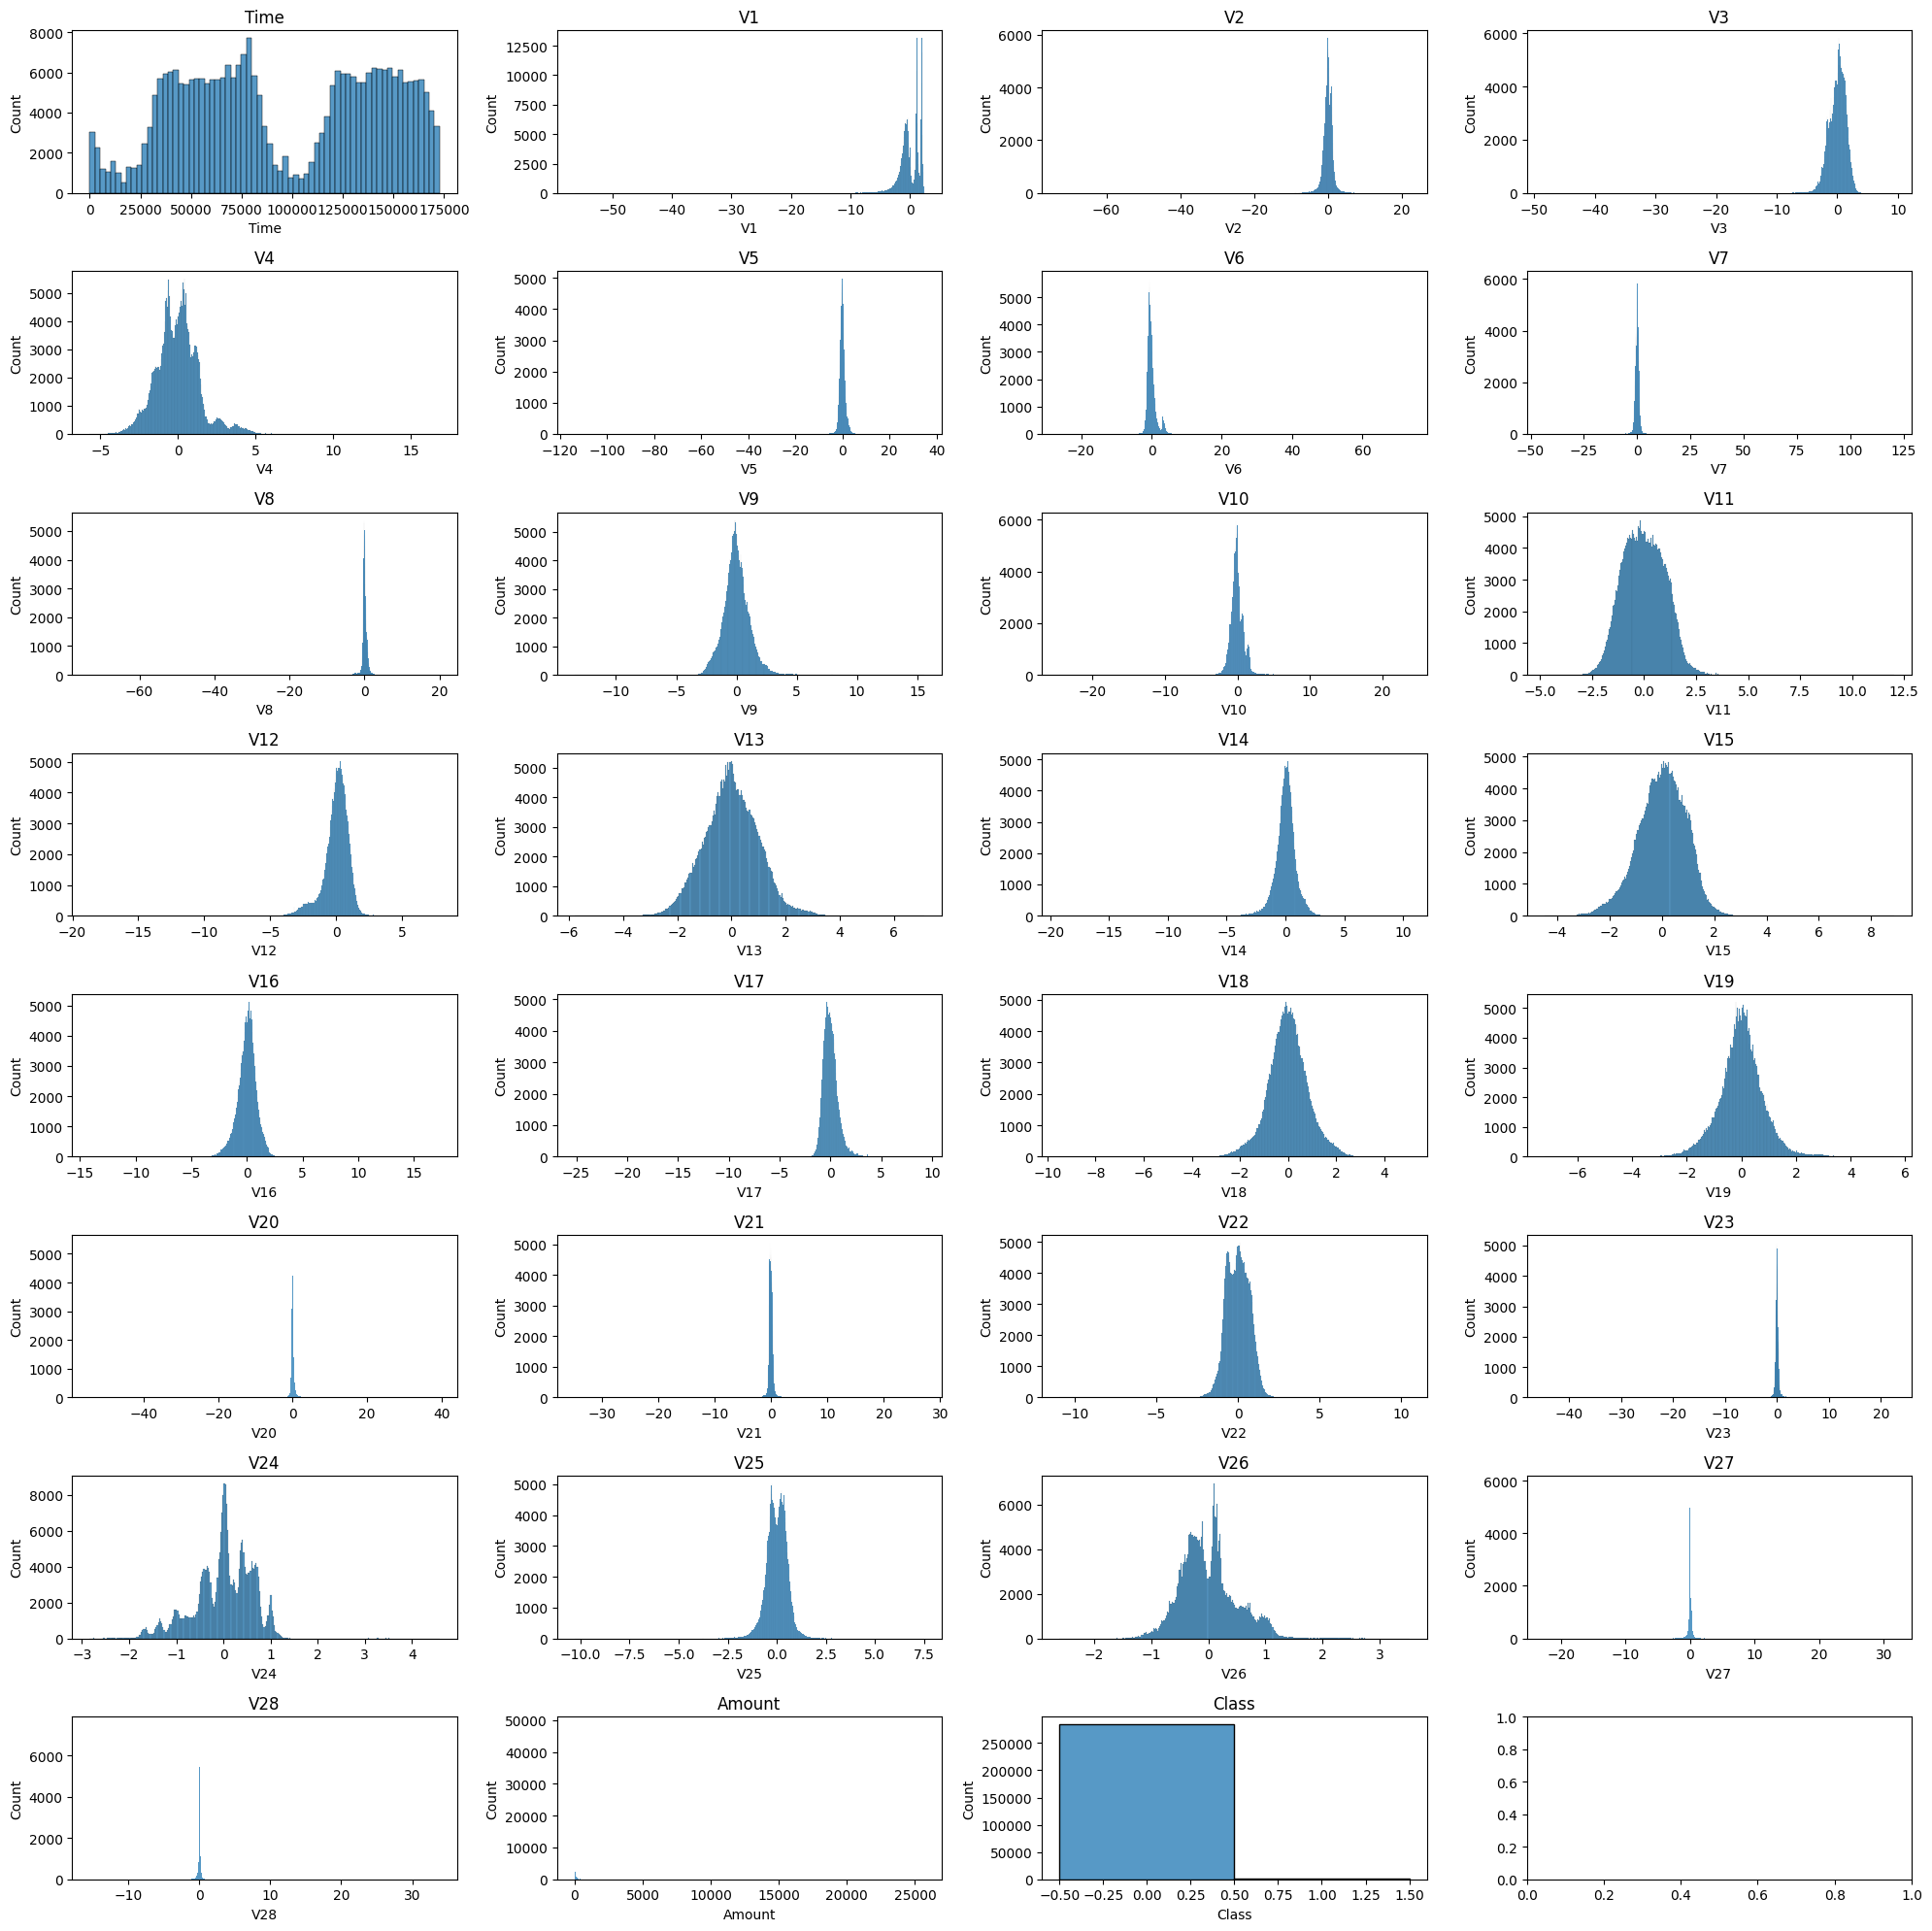

In [18]:
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

## 2.4. Correlation analysis

C:\Users\solmaz\AppData\Local\Temp\ipykernel_18916\3731232938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method='pearson')#consider linear relationship
C:\Users\solmaz\AppData\Local\Temp\ipykernel_18916\3731232938.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = df.corr(method='spearman')#consider monotonic relationship, not necessarily linear


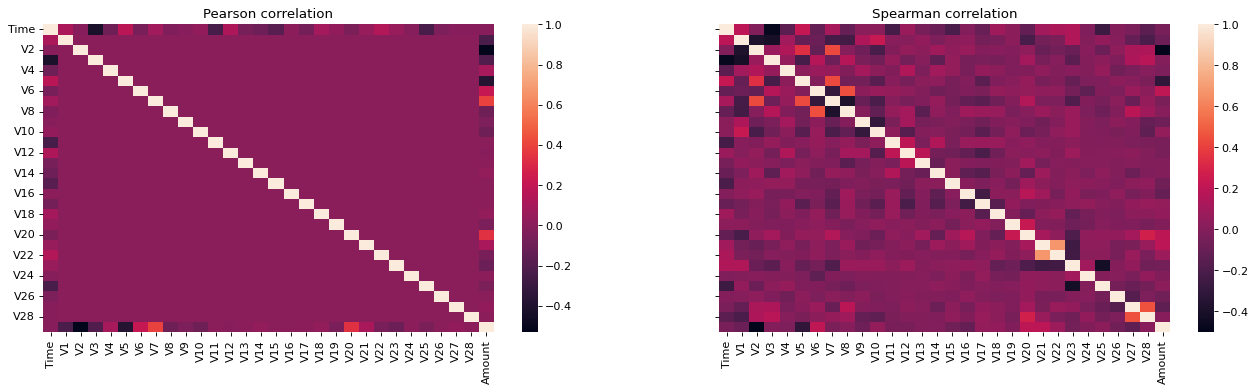

In [41]:
corr_pearson = df.corr(method='pearson')#consider linear relationship

corr_spearman = df.corr(method='spearman')#consider monotonic relationship, not necessarily linear

fig, ax = plt.subplots(1, 2, figsize=(20,5), dpi=80, sharey=True)
sns.heatmap(corr_pearson, ax=ax[0])
ax[0].set_title("Pearson correlation")

sns.heatmap(corr_spearman, ax=ax[1])
ax[1].set_title("Spearman correlation")
plt.show()

### Interpretation
It seems that features are linearly independent. Although, it sems there is an element of non linear relationship between features.

## 2.5. Scatter plot within each category

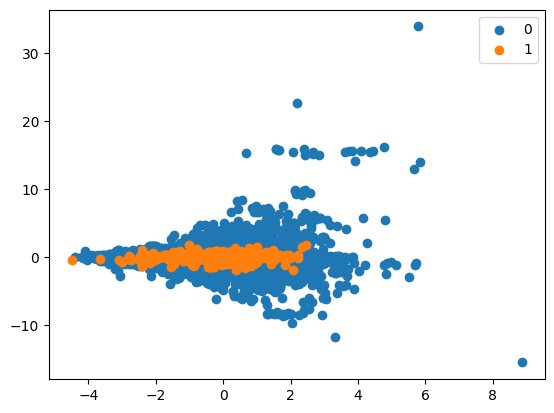

In [66]:
target_label= list(df['Class'].value_counts().keys())
for i in target_label:
    plt.scatter(df[df["Class"] == i].V15, df[df["Class"] == i].V28 ,label = i)
plt.legend()
plt.show()

## 2.6. PCA and visualization 

In [123]:
pca = PCA(n_components=2)
df_new = df.drop(columns =["Class"])
pca.fit(df_new)
print(pca.explained_variance_ratio_)


[9.99972249e-01 2.77382192e-05]


In [127]:
pca.components_, pca.components_.shape

(array([[-9.99999998e-01, -4.84213013e-06,  3.68357062e-07,
          1.33980395e-05,  3.13835494e-06, -5.03035829e-06,
          1.76791711e-06, -2.20685528e-06,  9.29297771e-07,
          2.00357707e-07, -7.02005533e-07,  5.32385145e-06,
         -2.61641642e-06,  1.38119916e-06,  1.99350513e-06,
          3.53599227e-06, -2.19632141e-07,  1.31093856e-06,
         -1.59625272e-06, -4.96694126e-07,  8.25763198e-07,
         -6.91950413e-07, -2.20147349e-06, -6.72513028e-07,
          2.06377862e-07,  2.55855302e-06,  4.20475921e-07,
          4.36422858e-08,  6.54262607e-08,  5.58126566e-05],
        [ 5.58126945e-05, -1.77367991e-03, -3.50953036e-03,
         -1.30547374e-03,  5.52637298e-04, -2.12213333e-03,
          1.14698369e-03,  1.96972449e-03, -4.94129709e-04,
         -1.94765435e-04, -4.40496285e-04, -1.02877671e-05,
         -3.28571554e-05,  1.82861277e-05,  1.25352424e-04,
         -1.80423738e-05, -1.32555459e-05,  2.21837037e-05,
          1.22689032e-04, -1.81763369e-

In [138]:
df_pca = pca.transform(df_new)
pd.DataFrame(df_pca, columns =['f1', 'f2'])


,f1,f2
0,94813.862881,55.979467
1,94813.854640,-90.953660
2,94812.875662,285.024840
3,94812.861396,29.859853
4,94811.858408,-23.652028
...,...,...
284802,-77972.145224,-83.234357
284803,-77973.143811,-59.208747
284804,-77974.141489,-16.118680
284805,-77974.144652,-73.998715


In [135]:
y = df["Class"]
df_pca1 = pd.merge(pd.DataFrame(df_pca, columns =['f1', 'f2']), y, left_index=True, right_index=True)


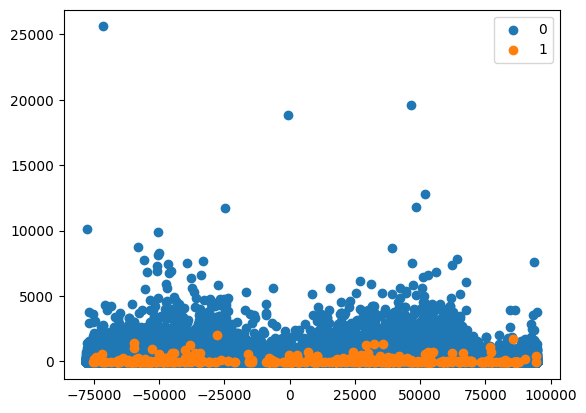

In [137]:
target_label= list(df_pca1['Class'].value_counts().keys())
for i in target_label:
    plt.scatter(df_pca1[df_pca1["Class"] == i].f1 , df_pca1[df_pca1["Class"] == i].f2 ,label = i)
plt.legend()
plt.show()

### Interpretation
To see the distribution of data in the plane, we first reduced he dimention of data using PCA and then plot the scatter plot within each class.It seems feature 2 is vary low for the minor class.

# 3. Missing values

In [75]:
missing_values = dict(df.isnull().sum())

no_missing = 0
for i in missing_values.keys():
    if missing_values[i] !=0:
        no_missing +=1
        print(i)
        

if no_missing == 0:
    print("There is no missing values")


There is no missing values


# 4. Outliers

<AxesSubplot: >

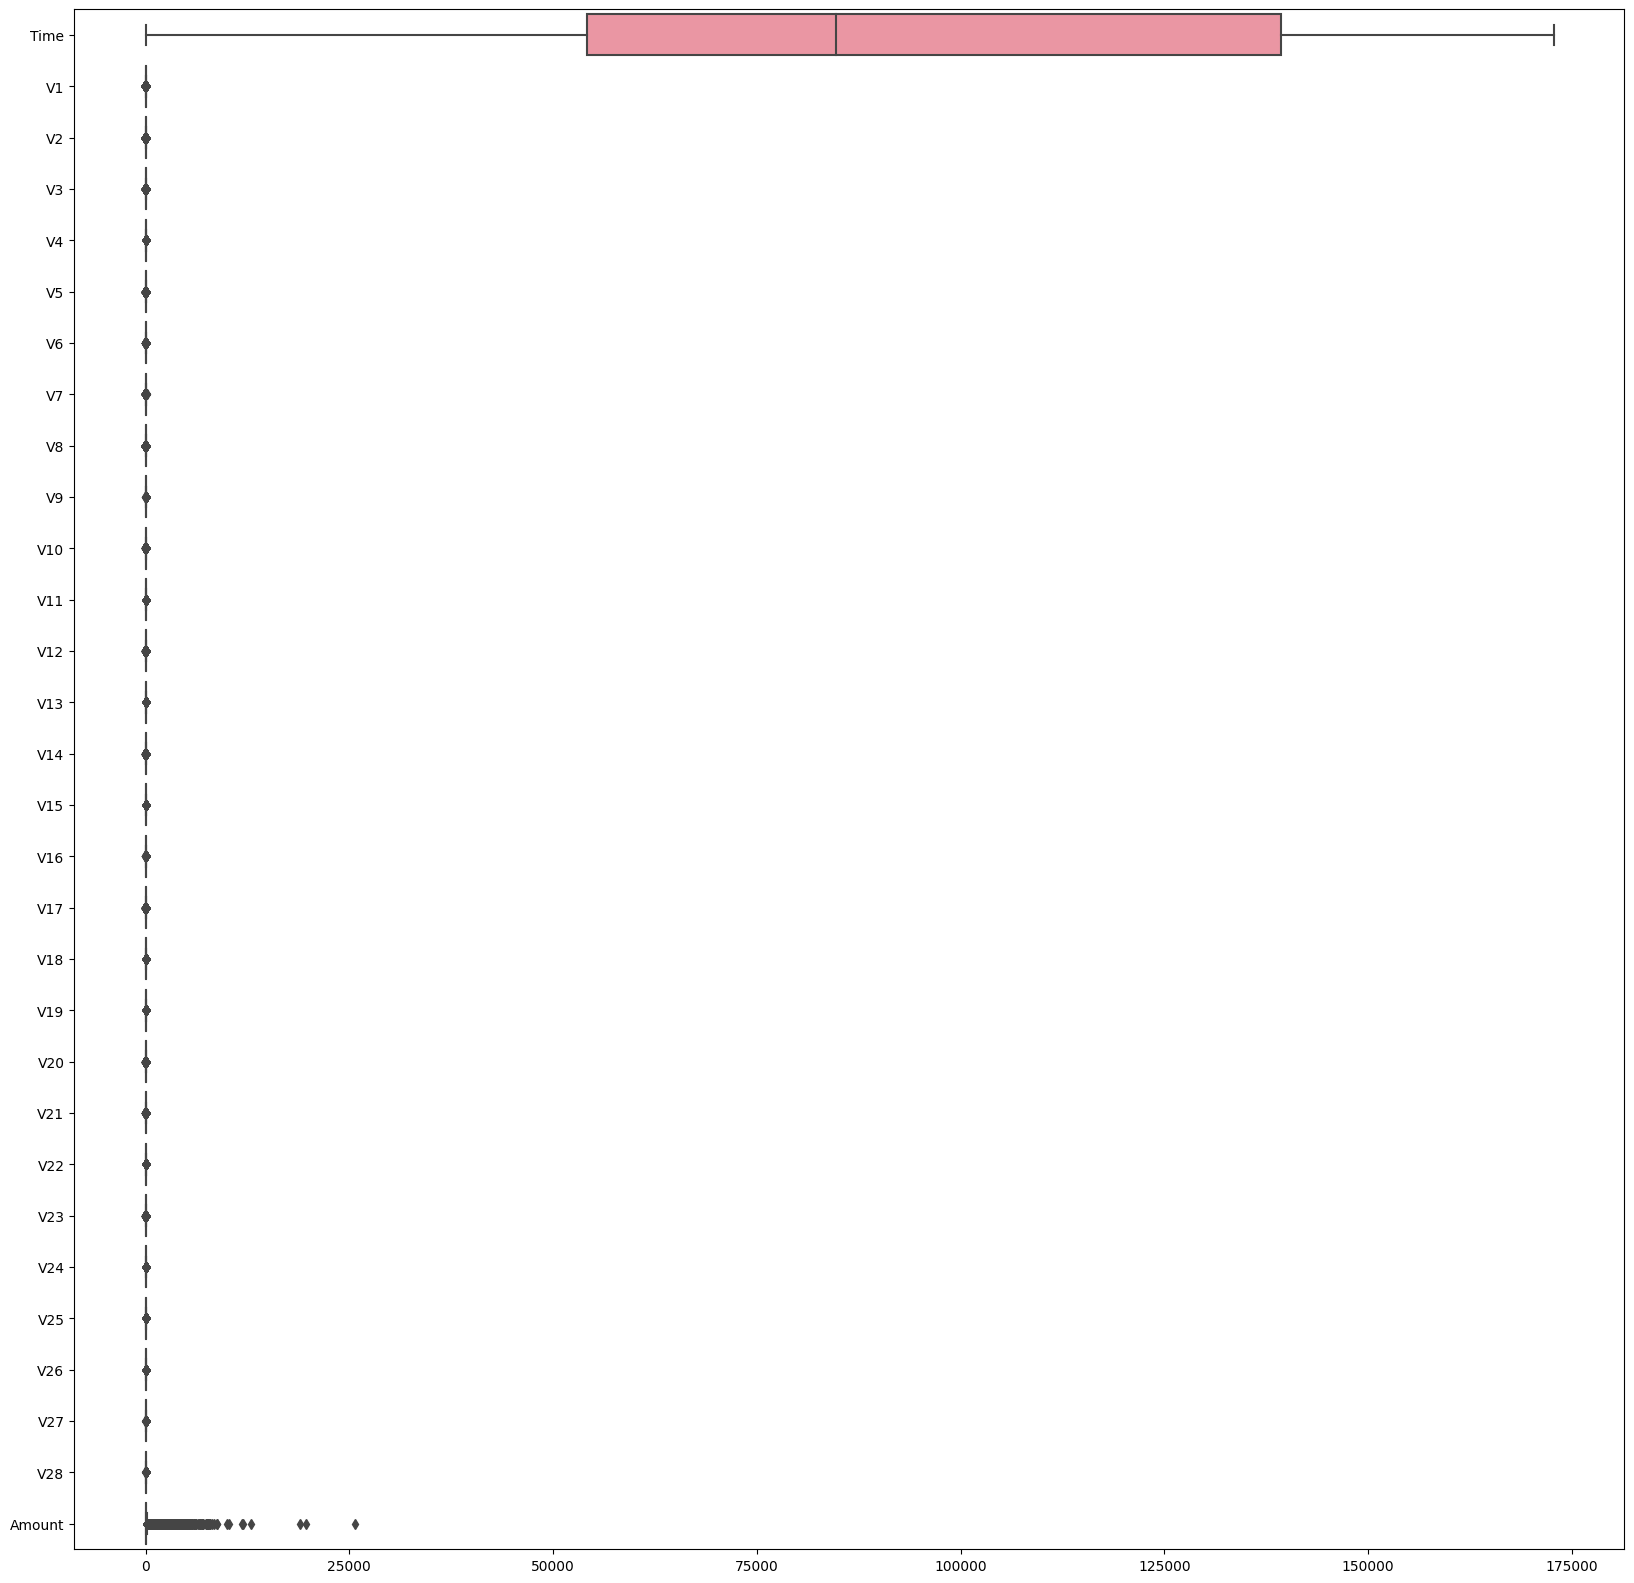

In [20]:
df_new = df.drop(columns =["Class"])
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=df_new, orient= "h", whis=2)



In [21]:


# Calculate the IQR (Interquartile Range) for each column
Q1 = df_new.quantile(.25)
Q3 = df_new.quantile(.75)
IQR = Q3 - Q1

#Remove outliers based on IQR
df_new2= df_new[~((df_new < (Q1 - 2 * IQR)) | (df_new > (Q3 + 2 * IQR))).any(axis=1)]

In [22]:
print(df_new2.shape)

(187212, 30)


In [23]:
(df.shape[0] - df_new2.shape[0])/df.shape[0]

0.3426706506511427

In [24]:
#df1 is the new dataframe after remopving outliers
y = df["Class"]
df1 = pd.merge(df_new2, y, left_index=True, right_index=True)
print(df1.shape)

(187212, 31)


In [25]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


In [26]:
df1.Class.value_counts()

0    187187
1        25
Name: Class, dtype: int64

In [76]:
25/(25+187187)

0.00013353844839006045

### Interpretation

It shows almost all data from class 1 was removed. So, I prefer to continue the task with the original dataset.

# 5. Trian Model

##  5.1. Train Test split

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df["Class"]



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(f"value counts of each class in the test data:\n {y_test.value_counts()}")
print(f"value counts of each class in the train data:\n {y_train.value_counts()}")
print(y.value_counts())

(199364, 30)
(85443, 30)
value counts of each class in the test data:
 0    85295
1      148
Name: Class, dtype: int64
value counts of each class in the train data:
 0    199020
1       344
Name: Class, dtype: int64
0    284315
1       492
Name: Class, dtype: int64


In [42]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [27]:
# define the performance function for evaluation the performance of the models
def performance(model):
    train_performance = []
    test_performance = []
    metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
    for m in metrics_list:
        train_performance.append(m(y_train,model.predict(X_train)))
        test_performance.append(m(y_test, model.predict(X_test)))

    
    performance_df = pd.DataFrame([train_performance,test_performance], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
    display(performance_df)

    #confusion matrix:

    fig, ax = plt.subplots(1,2,figsize = (12,5))

    cm_train_display = metrics.ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax= ax[0])#display_labels = [False, True])
    ax[0].set_title("Trian")

    cm_test_display = metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = ax[1] )#display_labels = [False, True])
    ax[1].set_title("Test")

    cm_train_display.confusion_matrix
    cm_test_display.confusion_matrix
    plt.show()

## 5.2. pipe1: XGBoost


### 5.2.1. SMOTE and Xgboost

In [28]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', xgb.XGBClassifier())
])

#### Train pipe1 with cross_validation technique. With this method, I could not find a way to check the model performance on test data

In [33]:
y_train_predict = cross_val_predict(pipe1, X_train, y_train, cv=5,) #method='predict_proba')


In [34]:
print(y_train_predict)
print(len(y_train))
print(len(y_train_predict))


[0 0 0 ... 0 0 0]
199364
199364


In [35]:
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict )
f1 = f1_score(y_train,y_train_predict )


# Print the metrics

print('Precision: {:.3f}'.format(precision.mean()))
print('Recall: {:.3f}'.format(recall.mean()))
print('F1-Score: {:.3f}'.format(f1.mean()))

Precision: 0.787
Recall: 0.837
F1-Score: 0.811


#### fit and trasfrom pipe1

,accuracy,precision,recall,f1
trian,1.00000,1.000000,1.000000,1.00000
test,0.99938,0.802548,0.851351,0.82623


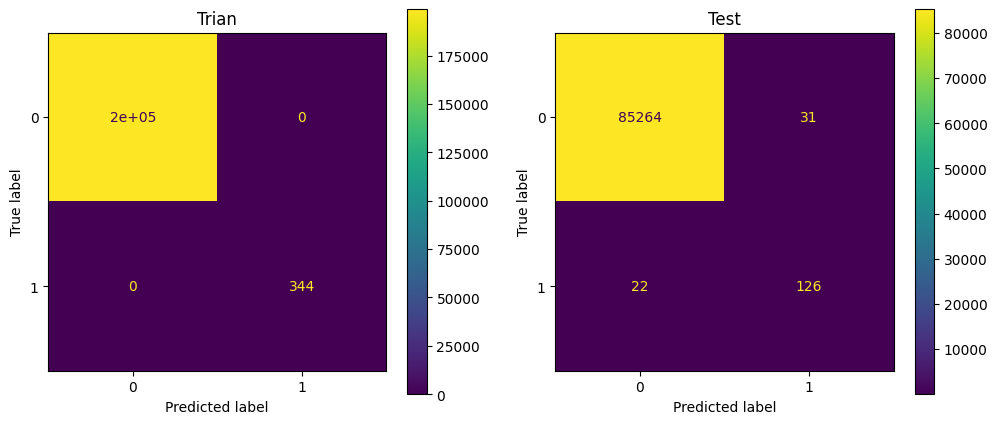

In [30]:
pipe1.fit(X_train, y_train)

performance(pipe1)

#### Plot ROC curve

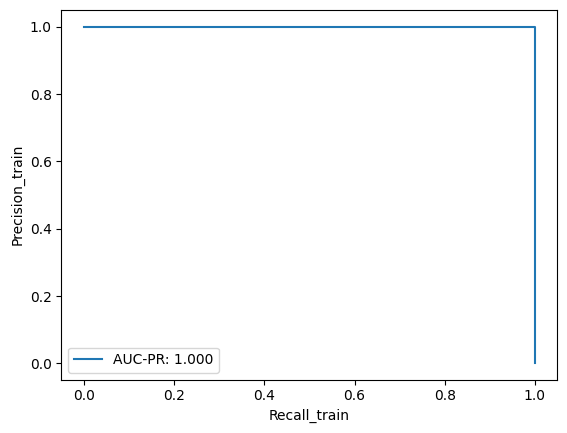

In [31]:
precision_auc, recall_auc, thresholds_auc = precision_recall_curve(y_train, pipe1.predict(X_train))
auc_pr = auc(recall_auc, precision_auc)
plt.plot(recall_auc, precision_auc, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall_train')
plt.ylabel('Precision_train')
plt.legend()
plt.show()

In [32]:
print(f"precision: {precision_auc}")
print(f"recall: {recall_auc}")
print(f"threshhold: {thresholds_auc}")
print(f"auc_pr: {auc_pr}")

precision: [0.00172549 1.         1.        ]
recall: [1. 1. 0.]
threshhold: [0 1]
auc_pr: 1.0


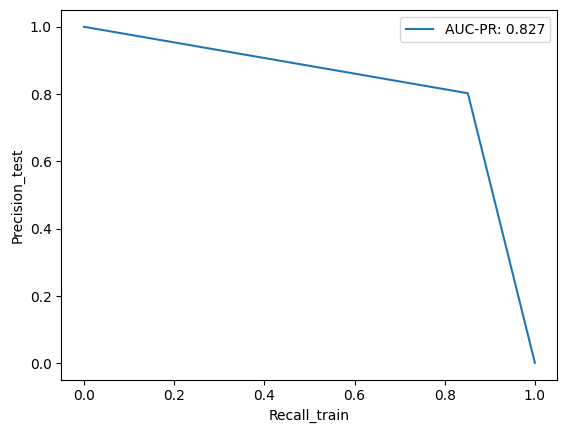

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe1.predict(X_test))
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall_train')
plt.ylabel('Precision_test')
plt.legend()
plt.show()

#### Interpretation
We want to predict all fradulant activities. So we want to predict the actual memnbers of class 1 correctly. So, FN (Falsly predicted in negative class (class =0))(Truelabel =1, predicted label =0) is the important error error. So, the perfect model is a one that has the highest recall or row metric.

### 5.2.2 Xgboost and RandomOverSampler

,accuracy,precision,recall,f1
trian,1.000000,1.000000,1.000000,1.000000
test,0.999649,0.960938,0.831081,0.891304


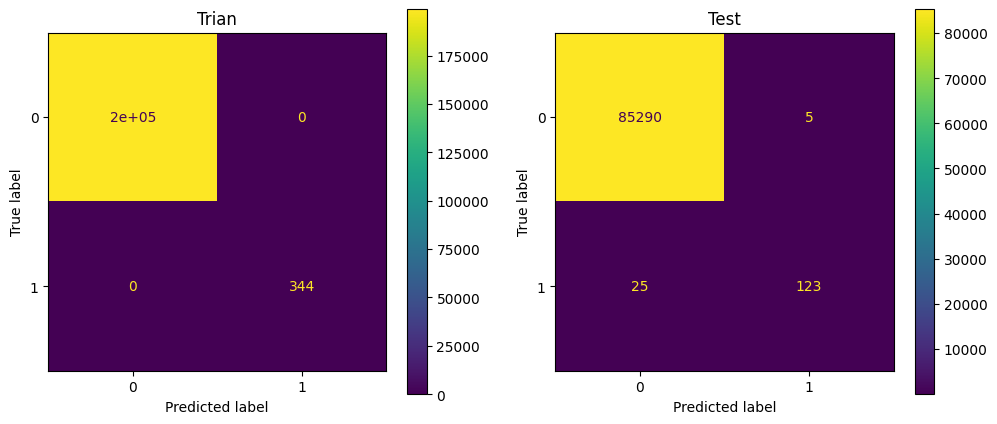

In [35]:


pipe1_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler()),
    ('classifier', xgb.XGBClassifier())
])

pipe1_2.fit(X_train, y_train)

performance(pipe1_2)

## 5.3. pipe2: Random Forest

### 5.3.1 Random Forest(without assigning any hyper parameter)

In [37]:
rf = RandomForestClassifier()
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', rf)
])

,accuracy,precision,recall,f1
trian,1.000000,1.000000,1.000000,1.000000
test,0.999579,0.924242,0.824324,0.871429


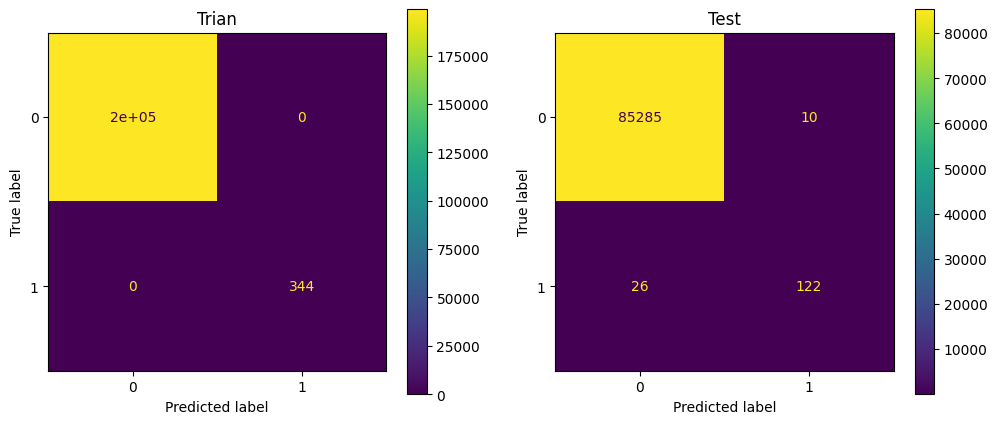

In [38]:
pipe2.fit(X_train, y_train)

performance(pipe2)

### 5.3.2. Hyper parameter tuning based on guesses

We have overfitting for the above model. Let's reduce the depth of trees and min_sample_split. In faact, these are the important hyper parameter of the Random forest model:
  1. n_estimators = number of trees in the foreset
  2. max_features = max number of features considered for splitting a node
  3. max_depth = max number of levels in each decision tree
  4. min_samples_split = min number of data points placed in a node before the node is split
  5. min_samples_leaf = min number of data points allowed in a leaf node
  6. bootstrap = method for sampling data points (with or without replacement)


Let's first see the parameteres in the above model:

In [43]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now, let's try other parameteres:

In [44]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf=10, bootstrap = False, class_weight= {1:3, 0:1}, min_samples_split= 5)
pipe2_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', rf)
])

,accuracy,precision,recall,f1
trian,0.994252,0.230872,1.000000,0.375136
test,0.994394,0.218058,0.864865,0.348299


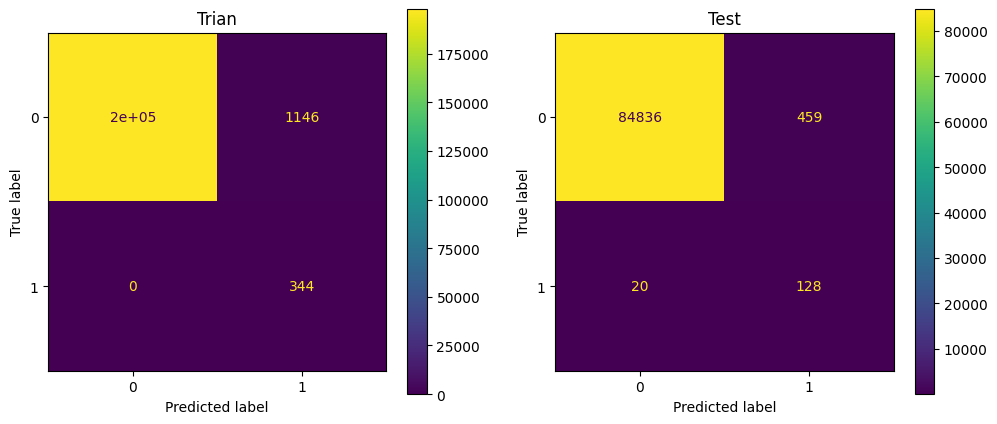

In [45]:
pipe2_2.fit(X_train, y_train)

performance(pipe2_2)

In [46]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf=10, bootstrap = False, min_samples_split= 5)
pipe2_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', rf)
])

,accuracy,precision,recall,f1
trian,0.998912,0.614828,0.988372,0.758082
test,0.998748,0.596244,0.858108,0.703601


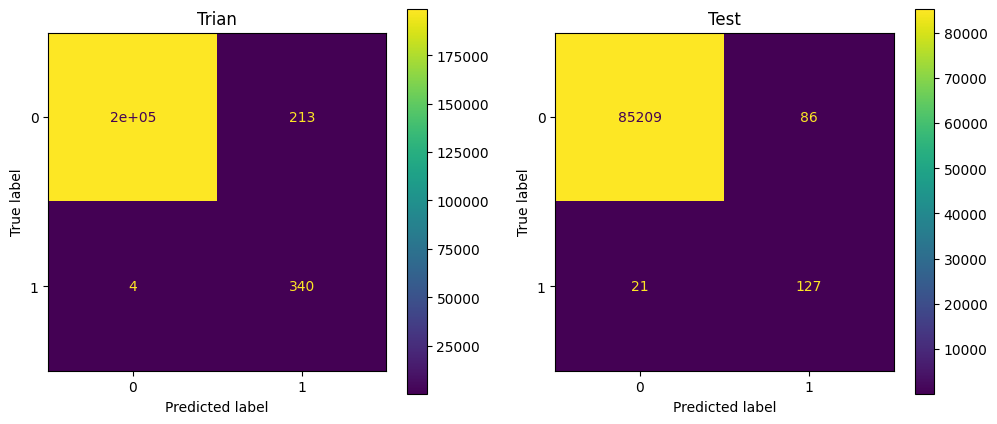

In [47]:
pipe2_3.fit(X_train, y_train)

performance(pipe2_3)



### 5.3.3. Random forest hyper parameter tuning using random search

In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,8,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'recall', param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(train_features, train_labels)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 5 and 3 respectively).

In [50]:
pipe2_random = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', rf_random)
])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,accuracy,precision,recall,f1
trian,0.999940,0.966292,1.000000,0.982857
test,0.999544,0.897810,0.831081,0.863158


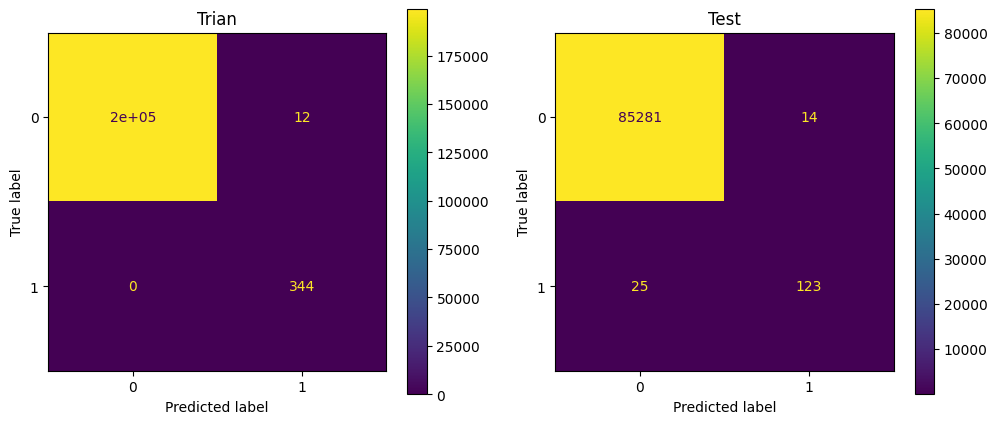

In [51]:
pipe2_random.fit(X_train, y_train)

performance(pipe2_random)

In [52]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [53]:
rf_random.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [54]:
rf_random.best_score_

1.0

In [55]:
pipe2_best_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', rf_random.best_estimator_)
])

,accuracy,precision,recall,f1
trian,0.999940,0.966292,1.000000,0.982857
test,0.999555,0.904412,0.831081,0.866197


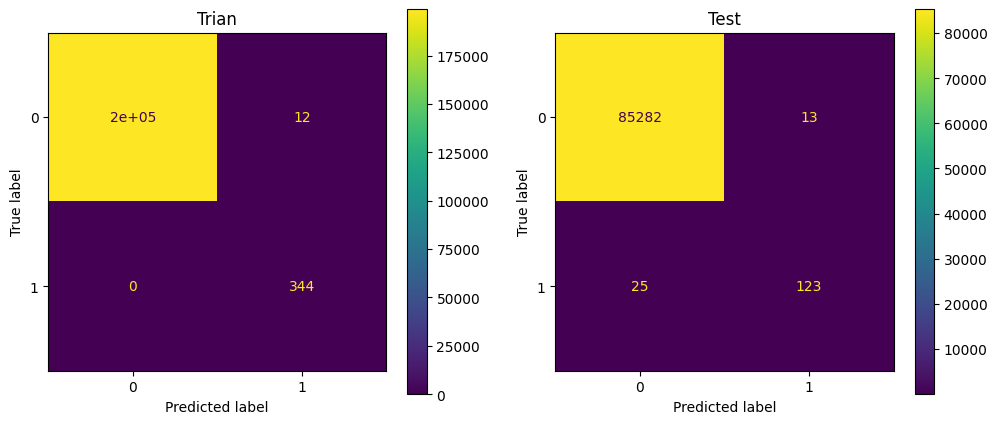

In [56]:
pipe2_best_estimator.fit(X_train, y_train)

performance(pipe2_best_estimator)

## 5.4. pipe3: Logestic regression

### 5.4.1. Logestic regression and SMOTE

In [57]:
lr= LogisticRegression(penalty='l2', class_weight = {1:1,0:1}, C=0.001 , max_iter=200, random_state=15, solver= 'saga')
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', lr)
])

,accuracy,precision,recall,f1
trian,0.978913,0.069964,0.912791,0.129967
test,0.979600,0.072844,0.918919,0.134988


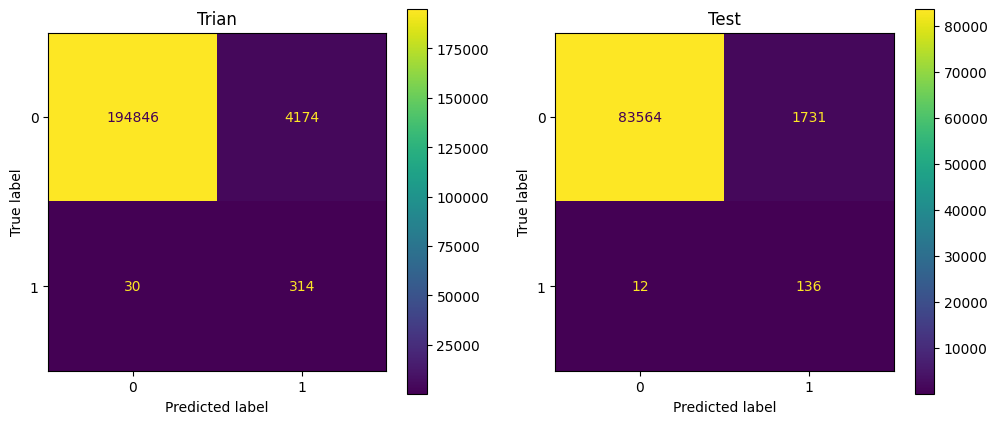

In [58]:
pipe3.fit(X_train, y_train)

performance(pipe3)

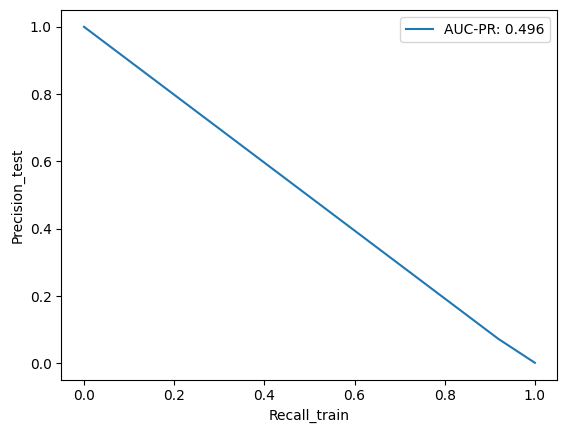

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe3.predict(X_test))
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall_train')
plt.ylabel('Precision_test')
plt.legend()
plt.show()

### 5.4.2. Logestic regression and RandomOverSampler

In [60]:


lr = LogisticRegression(penalty='l2', class_weight = {1:1,0:1}, C=0.001 , max_iter=200, random_state=15, solver= 'saga')
pipe3_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler()),
    ('classifier', lr)
])


,accuracy,precision,recall,f1
trian,0.978923,0.069804,0.909884,0.129660
test,0.979530,0.072611,0.918919,0.134587


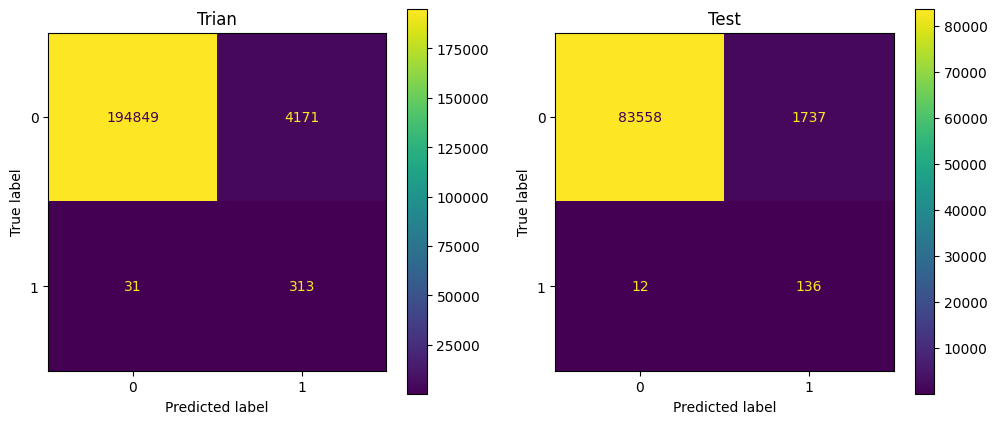

In [61]:
pipe3_1.fit(X_train, y_train)

performance(pipe3_1)

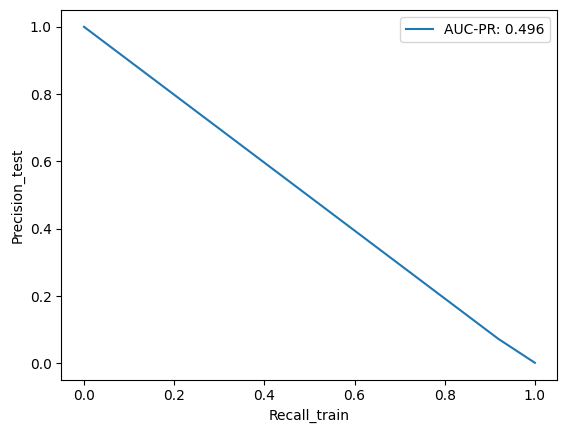

In [62]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe3.predict(X_test))
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall_train')
plt.ylabel('Precision_test')
plt.legend()
plt.show()


## 5.5. pipe 4: SVM

In [63]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE()),
    ('classifier', svm)
])

,accuracy,precision,recall,f1
trian,0.989226,0.135408,0.973837,0.237757
test,0.989724,0.128310,0.851351,0.223009


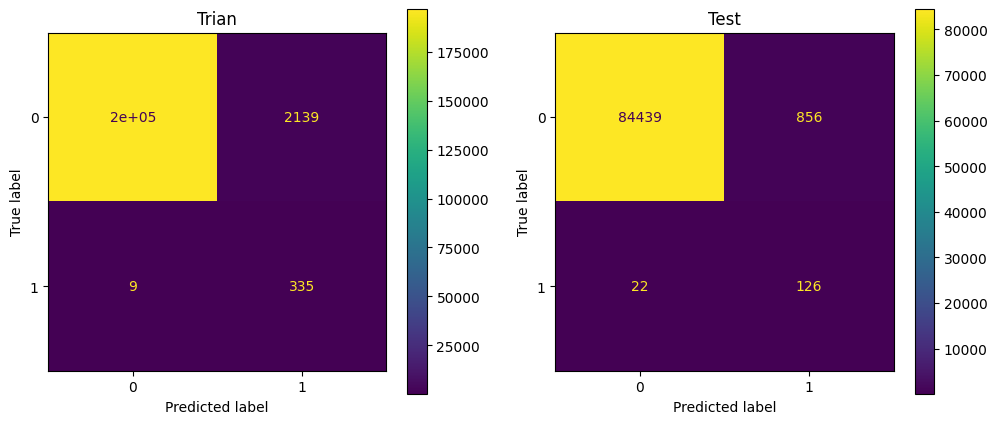

In [64]:
pipe4.fit(X_train,y_train)

performance(pipe4)

# Coclusion. 
As we said earlier, the most important metric for us in this project is recall and among all above models, pip1, pipe1_2,pipe2, pip2_random, pipe_2_best_estimator have promissing performance. 
Note that, although the LogesticRegression has a better recall, its performance in predicting the class=0 (precision) is very weak which is not a good senario. In fact, to obtain a better result, LogisticRegression and SVM reduce the accuracy in predicting class = 0.

To choose the best pipeline among those we stated, we need to compare the mean of their metrics on various test, trian splits to make sure their performce keep promissing. Thus the next anf final step is to create a loop for spliting data into trian and test and fir all the above pipelines on it. The winner is the one with the best recall, percision, and F1 score.

